In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("spam copy.csv", encoding = "ISO-8859-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data.drop(["Unnamed: 2","Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)
data.rename({"v1" : "Spam/ham", "v2" : "messages"}, axis=1, inplace=True)
data.head()

,Spam/ham,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
from sklearn.preprocessing import LabelEncoder
model1 = LabelEncoder()
data["Spam/ham"] = model1.fit_transform(data["Spam/ham"])
data.head()

,Spam/ham,messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


<AxesSubplot:>

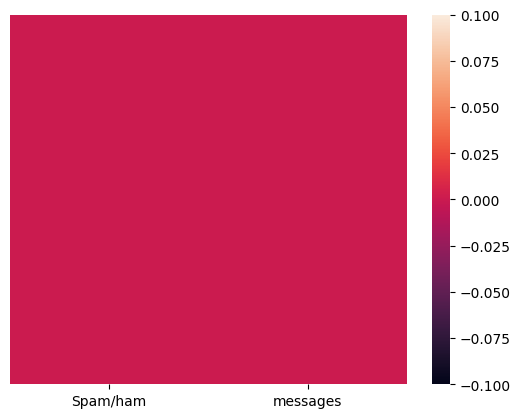

In [5]:
sbn.heatmap(data.isnull(), yticklabels= False)

In [6]:
data = data.drop_duplicates(keep='first')
data.shape

(5169, 2)

In [7]:
data.duplicated().sum()

0

<AxesSubplot:xlabel='Spam/ham', ylabel='count'>

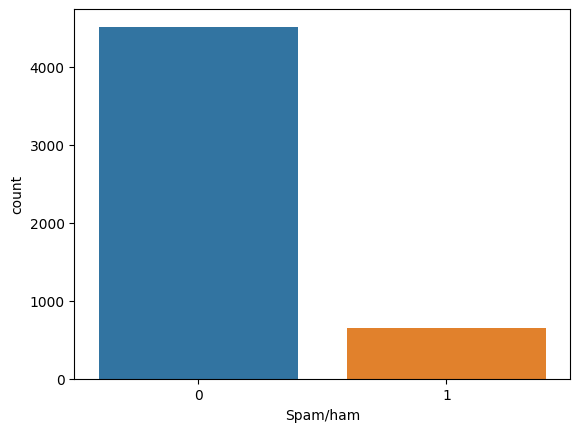

In [8]:
sbn.countplot(x="Spam/ham", data=data)

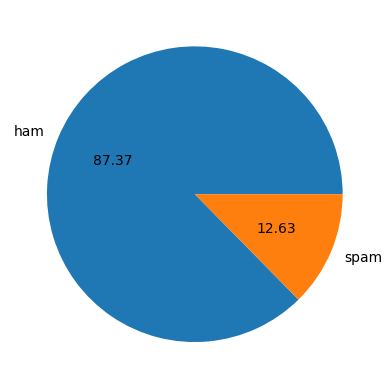

In [9]:
plt.pie(data["Spam/ham"].value_counts(), labels=["ham", "spam"], autopct="%0.2f")
plt.show()

In [10]:
import nltk
from nltk.corpus import stopwords

In [11]:
data["character_count"] = data["messages"].apply(len)
data.head()

,Spam/ham,messages,character_count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [12]:
# data["word_count"] = data["messages"].apply(lambda x:len(nltk.word_tokenize(x)))
data['word_count'] = data['messages'].apply(lambda x:len(nltk.word_tokenize(x)))
data["sentence_count"] = data["messages"].apply(lambda x:len(nltk.sent_tokenize(x)))
data.head()

,Spam/ham,messages,character_count,word_count,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [13]:
data[data["Spam/ham"] == 0].describe()

,Spam/ham,character_count,word_count,sentence_count
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.120903,1.799601
std,0.0,56.358207,13.493725,1.278465
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,28.000000


In [14]:
data[data["Spam/ham"] == 1].describe()

,Spam/ham,character_count,word_count,sentence_count
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.967841
std,0.0,30.137753,7.008418,1.483201
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,8.000000


<AxesSubplot:xlabel='character_count', ylabel='Count'>

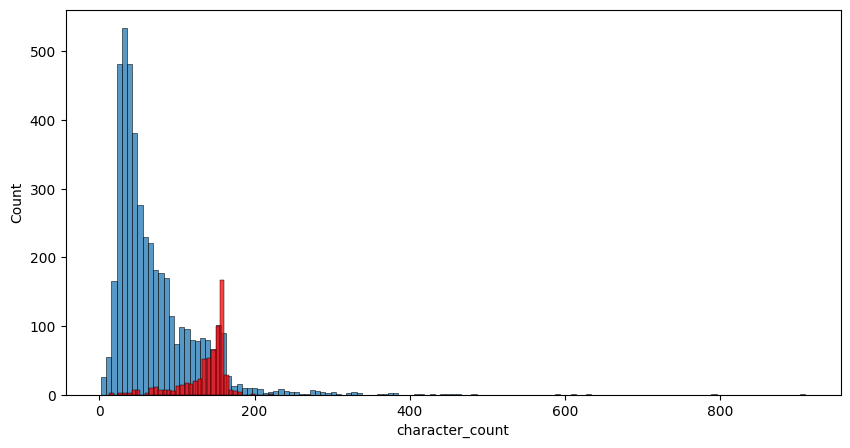

In [15]:
plt.figure(figsize=(10,5))
sbn.histplot(data[data["Spam/ham"] == 0]["character_count"])
sbn.histplot(data[data["Spam/ham"] == 1]["character_count"], color="red")

<AxesSubplot:xlabel='word_count', ylabel='Count'>

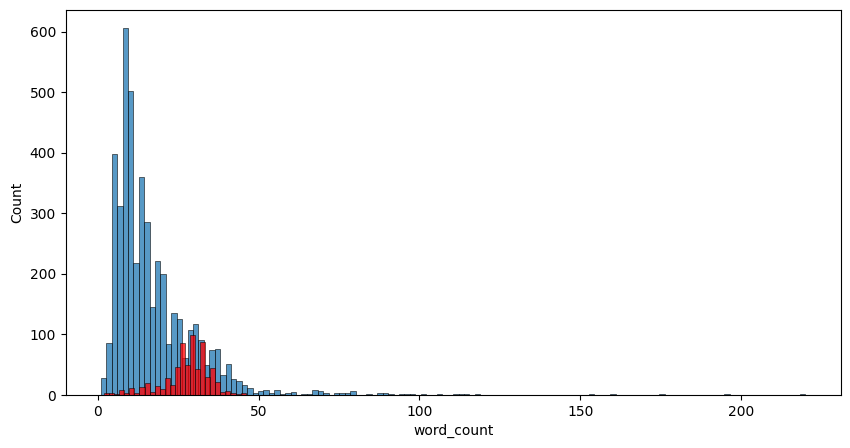

In [16]:
plt.figure(figsize=(10,5))
sbn.histplot(data[data["Spam/ham"] == 0]["word_count"])
sbn.histplot(data[data["Spam/ham"] == 1]["word_count"], color="red")

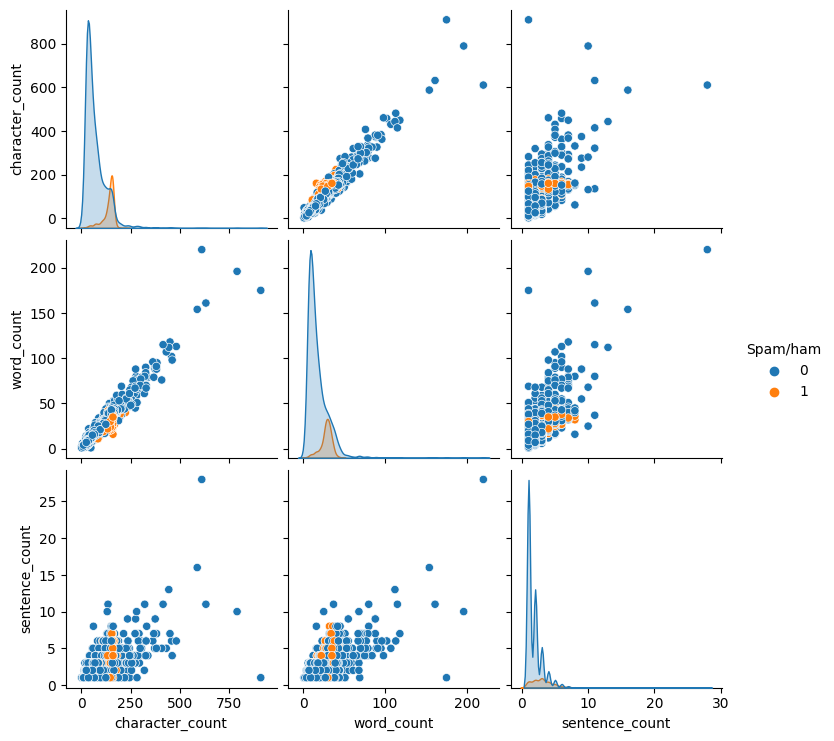

In [17]:
sbn.pairplot(data=data, hue="Spam/ham")

<AxesSubplot:>

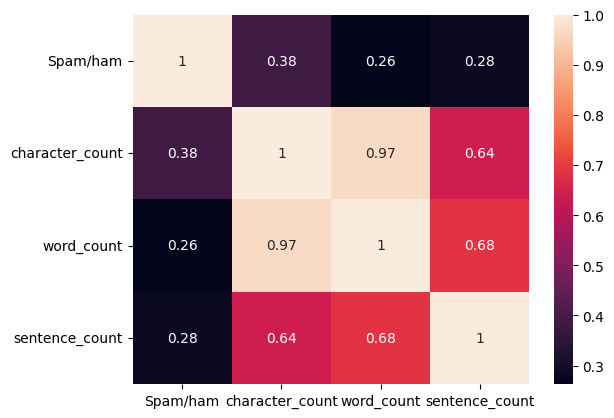

In [18]:
sbn.heatmap(data.corr(), annot=True)

In [26]:
import string
from nltk.stem.porter import PorterStemmer
model2 = PorterStemmer()
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
def message_transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    req_words = []
    for i in text:
        if i.isalnum() == True:
            req_words.append(i)
    req_words1 = []
    for i in req_words:
        if i not in stopwords.words("english") and i not in string.punctuation:
            req_words1.append(i)
    req_words2 = []
    for i in req_words1:
        req_words2.append(model2.stem(i))

    return " ".join(req_words2)

In [30]:
message_transform("Hello World! and nice to meeting you**20")

'hello world nice meet 20'

In [33]:
data["message_update"] = data["messages"].apply(message_transform)
data.head()

,Spam/ham,messages,character_count,word_count,sentence_count,message_update
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [34]:
from wordcloud import WordCloud

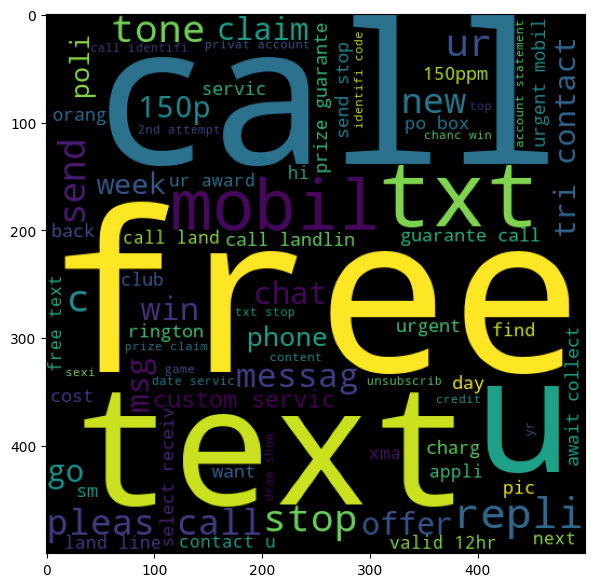

In [38]:
word_cloud = WordCloud(height= 500, width=500, min_font_size=10, background_color= "black")
spam_word_cloud = word_cloud.generate(data[data["Spam/ham"] == 1]["message_update"].str.cat(sep=" "))
plt.figure(figsize=(14,7))
plt.imshow(spam_word_cloud)

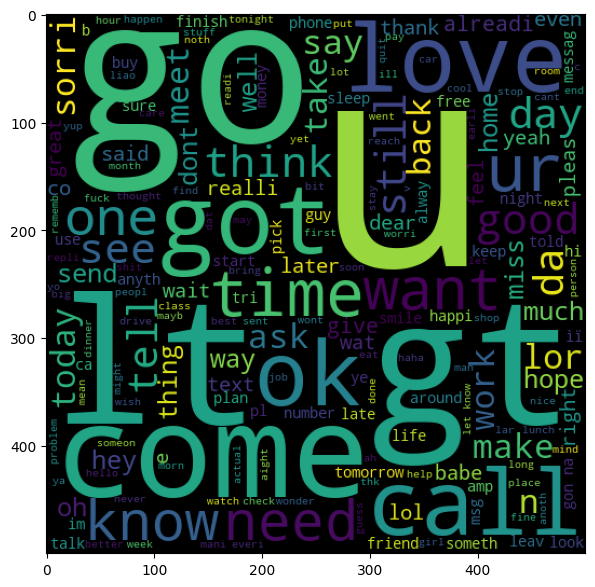

In [40]:
word_cloud = WordCloud(height= 500, width=500, min_font_size=10, background_color= "black")
ham_word_cloud = word_cloud.generate(data[data["Spam/ham"] == 0]["message_update"].str.cat(sep=" "))
plt.figure(figsize=(14,7))
plt.imshow(ham_word_cloud)

In [42]:
spam_corpus = []
for msg in data[data['Spam/ham'] == 1]['message_update'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [43]:
from collections import Counter

In [57]:
data1 = pd.DataFrame(Counter(spam_corpus).most_common(30))
data1

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [53]:
ham_corpus = []
for msg in data[data['Spam/ham'] == 0]['message_update'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [56]:
data2 = pd.DataFrame(Counter(ham_corpus).most_common(30))
data2

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234
